### **Exercise: Game of Life (no xarray, just python practice)**

Implement [Conway's game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy array to hold data.
Neighbours are defined as adjacent cells (all the 8).

 - Any LIVING cell with 2 or 3 neighbours survives.
 - Any DEAD cell with 3 neighbours comes alive.
 - Any OTHER LIVING cell dies.
 - All deaths and births occur simultaneously

So, at each step you need:

 - calculate the number of neighnours
 - set "dead" or "alive" status according to the above
 - plot

### Hints and directions:

*Implement everything in a class*.

For initial conditions: two files "ships.txt" and "guns.txt" are provided in data folder (but feel free to create your own if you wish), you can read them like

```python
field=np.genfromtxt("ships.txt").transpose()
```

For plotting: Jupyter is very finicky with "real-time" plots and there is a high chance it will refuse to plot everything in one frame even if you try all the stackoverflow solutions, so I propose just using a script to run your program. Try the following code to produce "animation" to test that it works:

```python
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0, 10, 0, 1])

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    plt.pause(0.5)
plt.show()

```

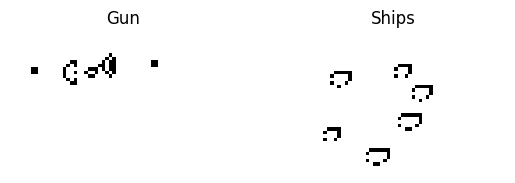

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class GameOfLife:
    def __init__(self, initial_state):
        self.grid = initial_state
        self.rows, self.cols = self.grid.shape

    def count_neighbors(self, row, col):
        neighbors = [(row-1, col-1), (row-1, col), (row-1, col+1),
                     (row, col-1),                 (row, col+1),
                     (row+1, col-1), (row+1, col), (row+1, col+1)]

        count = 0
        for r, c in neighbors:
            if 0 <= r < self.rows and 0 <= c < self.cols and self.grid[r, c] == 1:
                count += 1
        return count

    def update(self):
        new_grid = self.grid.copy()
        for i in range(self.rows):
            for j in range(self.cols):
                neighbors_count = self.count_neighbors(i, j)
                if self.grid[i, j] == 1:  # Living cell
                    if neighbors_count != 2 and neighbors_count != 3:
                        new_grid[i, j] = 0  # Dies
                else:  # Dead cell
                    if neighbors_count == 3:
                        new_grid[i, j] = 1  # Comes alive
        self.grid = new_grid


initial_state_gun = np.genfromtxt("data/gun.txt").transpose()
initial_state_ships = np.genfromtxt("data/ships.txt").transpose()
game_gun = GameOfLife(initial_state_gun)
game_ships = GameOfLife(initial_state_ships)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title('Gun')
ax1.axis('off')
img1 = ax1.imshow(game_gun.grid, cmap='binary')

ax2.set_title('Ships')
ax2.axis('off')
img2 = ax2.imshow(game_ships.grid, cmap='binary')

def update(frame):
    game_gun.update()
    img1.set_array(game_gun.grid)

    game_ships.update()
    img2.set_array(game_ships.grid)

    return img1, img2

animation = FuncAnimation(fig, update, frames=50, interval=200, blit=True)
#animation.save('gun_ships.gif', writer='pillow')
plt.show()
